In [92]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
df = pd.read_csv('student_scores.csv')



df_cleaned = df.fillna(np.mean(df['Hours']))


X = df_cleaned[['Hours']]
y = df_cleaned['Scores']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
df_cleaned


,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,4.995455,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


In [95]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.9682236939328291


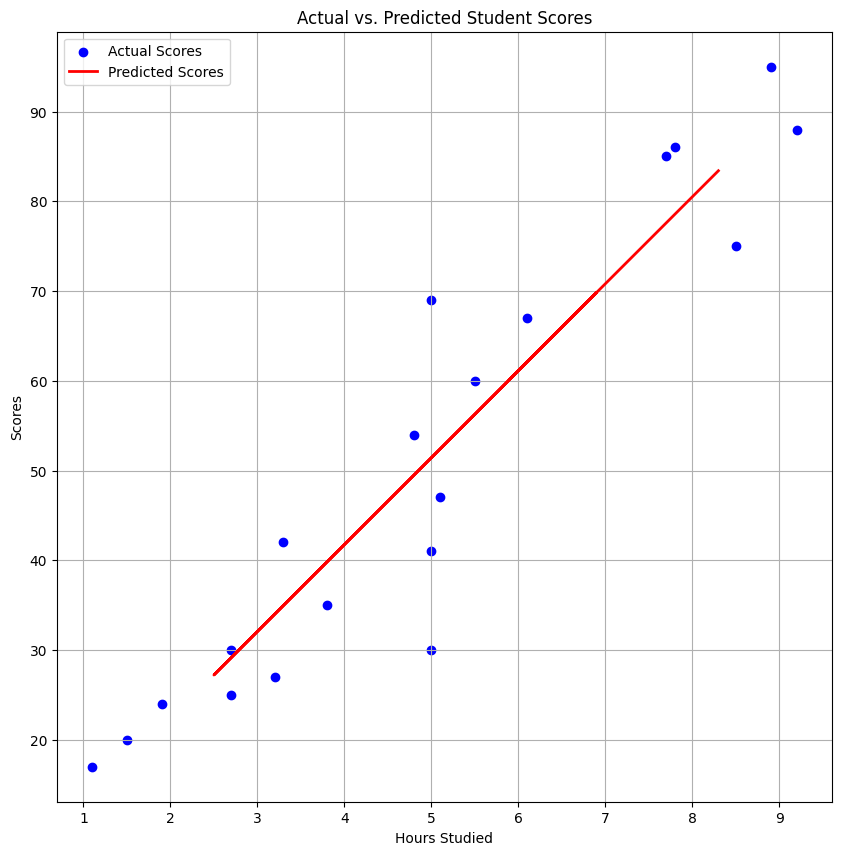

In [97]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Scores')
plt.title('Actual vs. Predicted Student Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

In [98]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('student_scores.csv')

df_cleaned = df.fillna(np.mean(df['Hours']))

X = df_cleaned[['Hours']]
y = df_cleaned['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)




LinearRegression()

R-squared: 0.9760734047389711


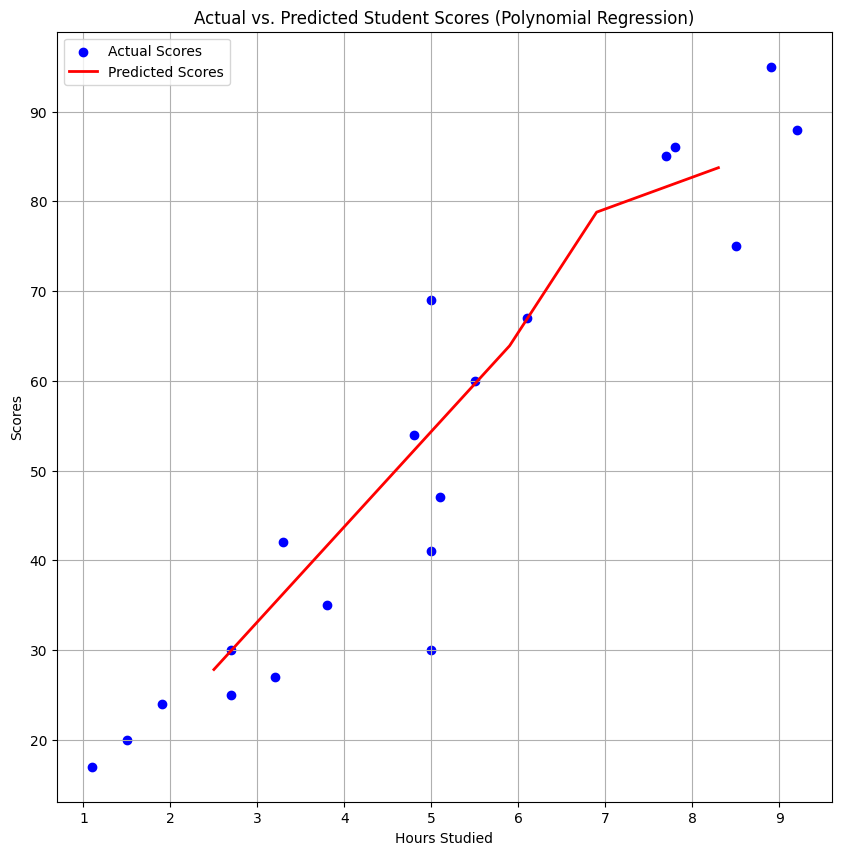

In [99]:
y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, color='blue', label='Actual Scores')

sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Scores')


plt.title('Actual vs. Predicted Student Scores (Polynomial Regression)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()